In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm
import multiprocessing as mproc
import os
import random

import model_opt
import data_generate
import algo_GD

_cmap = plt.cm.jet

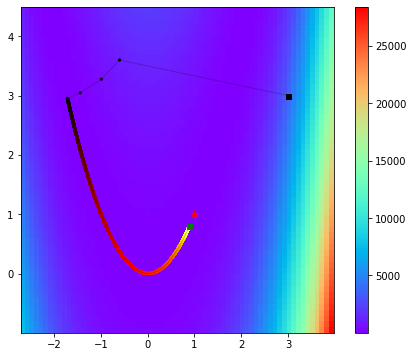

In [2]:
w_init = np.array([3,3])
_t_max = 2
f = model_opt.RosenBrock()



w_star = f.w_star
w_mean = [[3,3]]
w_store = np.array([[3,3]])
for j in range(10000):
    w_init = w_store[-1]
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.0005)
    for i in algo:
        algo.update(model=f)
        
    w_store = np.vstack((w_store,algo.wstore[-1]))
    w_mean.append(np.mean(w_store,axis=0))
    
    

grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=0.2,linewidth = 1)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)

# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ks', markersize=5,label="start")
axes.plot(*w_store[-1], 'gs', markersize=5,label="finish")
axes.plot(*w_star, 'r*', markersize=8,label="true value")

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()


In [3]:


f = model_opt.RosenBrock(err = 0)
w_store1 = w_store
plt.plot(f.f_opt(w_store1.T)[10:])
plt.xlim(10,10000)
plt.xlabel("step")
plt.title('expected loss')

TypeError: __init__() got an unexpected keyword argument 'err'

In [ ]:
w_store = np.array(w_mean)
grid_x_min = min(w_store.T[0].min(),w_star[0])-1
grid_x_max = max(w_store.T[0].max(),w_star[0])+1
grid_y_min = min(w_store.T[1].min(),w_star[1])-1
grid_y_max = max(w_store.T[1].max(),w_star[1])+1
xvals = np.arange(grid_x_min,grid_x_max, 0.1)
yvals = np.arange(grid_y_min,grid_y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])

fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=0.2,linewidth = 1)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)

# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ks', markersize=5)
axes.plot(*w_store[-1], 'gs', markersize=5)
axes.plot(*w_star, 'r*', markersize=8)

#カラーバーの設定
axpos = axes.get_position()
cbar_ax = fig.add_axes([0.9, axpos.y0, 0.03, axpos.height])
norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
mappable._A = []
fig.colorbar(mappable, cax=cbar_ax)

#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [ ]:
f = model_opt.RosenBrock(err = 0)
w_store2 = w_store
plt.plot(f.f_opt(w_store2.T)[10:])
plt.xlim(100,10000)
plt.ylim(0,10)
plt.xlabel("step")
plt.title('expected loss')

# plt.plot(*w_store[0], 'ks', markersize=5,label="start")
# plt.plot(*w_store[-1], 'gs', markersize=5,label="finish")
# plt.plot(*w_star, 'r*', markersize=8,label="true value")

# plt.legend()

In [ ]:
w_store2.T

In [ ]:
w_store2


